In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [22]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,NaN,2.0,109.0,0.0,NaN,2.0,3.0,3.0
1,0.0,67.0,3.0,NaN,564.0,0.0,NaN,160.0,0.0,NaN,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,NaN,0.0,141.0,NaN,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,NaN
4,0.0,74.0,2.0,120.0,269.0,NaN,NaN,121.0,NaN,0.2,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,NaN,199.0,1.0,0.0,162.0,NaN,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,NaN,263.0,NaN,0.0,173.0,0.0,NaN,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,NaN,0.0,2.0,153.0,NaN,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,NaN,192.0,NaN,0.0,NaN,0.0,0.4,2.0,0.0,6.0


In [23]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	44
float64		column 2	14
float64		column 3	70
float64		column 4	72
float64		column 5	42
float64		column 6	72
float64		column 7	56
float64		column 8	58
float64		column 9	56
float64		column 10	72
float64		column 11	70
float64		column 12	14
float64		column 13	44


In [24]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,226.000000,256.000000,200.000000,198.000000,228.000000,198.000000,214.000000,212.000000,214.000000,198.000000,200.0000,256.000000,226.000000
mean,0.668142,54.359375,3.255000,132.176768,248.793860,0.126263,1.028037,151.009434,0.313084,0.921212,1.6200,0.656250,4.610619
std,0.471926,9.003036,0.844715,16.255075,49.714042,0.332987,0.997254,22.068397,0.464836,0.943508,0.6144,0.940901,1.938768
min,0.000000,29.000000,1.000000,100.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.0000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,214.750000,0.000000,0.000000,139.750000,0.000000,0.000000,1.0000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.0000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,274.000000,0.000000,2.000000,165.000000,1.000000,1.500000,2.0000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.0000,3.000000,7.000000


<AxesSubplot:>

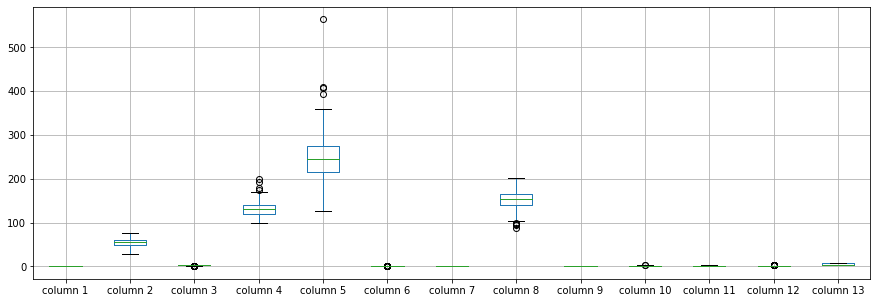

In [25]:
df.boxplot(return_type='axes', figsize=(15,5))

In [26]:
df.mean()

column 1       0.668142
column 2      54.359375
column 3       3.255000
column 4     132.176768
column 5     248.793860
column 6       0.126263
column 7       1.028037
column 8     151.009434
column 9       0.313084
column 10      0.921212
column 11      1.620000
column 12      0.656250
column 13      4.610619
dtype: float64

In [27]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.087774,0.010564,-0.076029,-0.240975,0.033726,-0.009848,-0.082318,0.236645,0.154908,0.079638,0.097102,0.431825
column 2,-0.087774,1.000000,0.113162,0.237657,0.226725,0.166382,0.076488,-0.383095,0.068563,0.292599,0.211470,0.350179,0.080978
column 3,0.010564,0.113162,1.000000,0.113304,0.089840,-0.045843,0.120622,-0.325150,0.239913,0.152689,0.208835,0.228946,0.232413
column 4,-0.076029,0.237657,0.113304,1.000000,0.140821,0.122672,0.092404,-0.030227,0.118598,0.150371,0.032494,0.063346,0.092086
column 5,-0.240975,0.226725,0.089840,0.140821,1.000000,-0.056797,0.093729,-0.071470,0.049065,0.066981,-0.009808,0.120481,0.010606
column 6,0.033726,0.166382,-0.045843,0.122672,-0.056797,1.000000,-0.030299,-0.000493,0.109793,-0.061637,-0.089113,0.159793,0.066460
column 7,-0.009848,0.076488,0.120622,0.092404,0.093729,-0.030299,1.000000,0.064952,0.042505,0.174622,0.211909,0.094547,-0.011439
column 8,-0.082318,-0.383095,-0.325150,-0.030227,-0.071470,-0.000493,0.064952,1.000000,-0.329492,-0.389528,-0.374404,-0.346118,-0.202308
column 9,0.236645,0.068563,0.239913,0.118598,0.049065,0.109793,0.042505,-0.329492,1.000000,0.177282,0.236164,0.115069,0.283730
column 10,0.154908,0.292599,0.152689,0.150371,0.066981,-0.061637,0.174622,-0.389528,0.177282,1.000000,0.606499,0.244446,0.313797


In [28]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+120,13+120+120,13+120+120+120,13+120+120+120+120,13+120+120+120+120+120,13+120+120+120+120,13+120+120+120,13+120+120,13+120,13], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 494.63883209228516
Epoch: 1 , loss: 498.10558319091797
Epoch: 2 , loss: 494.54124641418457
Epoch: 3 , loss: 494.0944938659668
Epoch: 4 , loss: 496.8938694000244
Epoch: 5 , loss: 495.0792751312256
Epoch: 6 , loss: 492.0551071166992
Epoch: 7 , loss: 497.074369430542
Epoch: 8 , loss: 498.66178131103516
Epoch: 9 , loss: 492.6863136291504
Epoch: 10 , loss: 491.7724075317383
Epoch: 11 , loss: 493.72943115234375
Epoch: 12 , loss: 488.47352027893066
Epoch: 13 , loss: 494.72853088378906
Epoch: 14 , loss: 489.80825424194336
Epoch: 15 , loss: 489.64115142822266
Epoch: 16 , loss: 487.86496353149414
Epoch: 17 , loss: 492.2930335998535
Epoch: 18 , loss: 488.84762382507324
Epoch: 19 , loss: 485.7990951538086
Epoch: 20 , loss: 485.8126697540283
Epoch: 21 , loss: 484.35524559020996
Epoch: 22 , loss: 479.3254089355469
Epoch: 23 , loss: 478.7681770324707
Epoch: 24 , loss: 464.0264701843262
Epoch: 25 , loss: 444.390708923

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.385834
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.000000,0.000000,-0.023088,0.000000,0.000000,0.000000,-2.303991,0.000000,0.0,0.000000
1,0.0,0.0,0.0,-40.555588,0.000000,0.000000,-1.680024,0.000000,0.000000,-1.317880,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,-0.064588,0.000000,0.000000,0.600372,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-5.779364
4,0.0,0.0,0.0,0.000000,0.000000,0.134763,-1.639057,0.000000,-0.613674,0.000000,-0.268468,0.0,-1.434931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,-76.383469,0.000000,0.000000,0.000000,0.000000,0.362481,0.000000,0.000000,0.0,0.000000
266,0.0,0.0,0.0,-10.889992,0.000000,0.008083,0.000000,0.000000,0.000000,0.726253,0.000000,0.0,0.000000
267,0.0,0.0,0.0,0.000000,-10.407684,0.000000,0.000000,0.000000,0.454542,0.000000,0.000000,0.0,0.000000
268,0.0,0.0,0.0,0.735855,0.000000,0.102243,0.000000,9.773788,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1186.4549370025632, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.21911527084564444

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       1.574859
column 4      66.616707
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      0.625085
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.000000,322.000000,-0.023088,2.000000,109.000000,0.000000,0.096009,2.000000,3.0,3.000000
1,0.0,67.0,3.0,74.444412,564.000000,0.000000,0.319976,160.000000,0.000000,0.282120,2.000000,0.0,7.000000
2,1.0,57.0,2.0,124.000000,261.000000,-0.064588,0.000000,141.000000,0.600372,0.300000,1.000000,0.0,7.000000
3,1.0,64.0,4.0,128.000000,263.000000,0.000000,0.000000,105.000000,1.000000,0.200000,2.000000,1.0,1.220636
4,0.0,74.0,2.0,120.000000,269.000000,0.134763,0.360943,121.000000,0.386326,0.200000,0.731532,1.0,1.565069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,95.616531,199.000000,1.000000,0.000000,162.000000,0.362481,0.500000,1.000000,0.0,7.000000
266,1.0,44.0,2.0,109.110008,263.000000,0.008083,0.000000,173.000000,0.000000,0.726253,1.000000,0.0,7.000000
267,0.0,56.0,2.0,140.000000,283.592316,0.000000,2.000000,153.000000,0.454542,1.300000,2.000000,0.0,3.000000
268,1.0,57.0,4.0,140.735855,192.000000,0.102243,0.000000,157.773788,0.000000,0.400000,2.000000,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_NW_20(imp).xlsx", index=False, header=False)